# Exploratory Data Analysis on the Titanic data set

In [74]:
%pip install -r req.txt
%pip install missingno

import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

Note: you may need to restart the kernel to use updated packages.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## 1. Data observation


In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 2. Data cleaning and handling 

In [78]:
# Drop inrelevant information
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [79]:
# Filling in missing data  : Age
# Use mean() will cause biased data for later analysis
# Using random choices from existing ages instead

import numpy as np

known_age = df["Age"].dropna()
size = df["Age"].isnull().sum()

random_ages = np.random.choice(known_age, size=size, replace=True)

df.loc[df["Age"].isnull(), "Age"] = random_ages

df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [80]:
# Filling in missing data  : Embarked

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

## 3. Data exploring and preprocessing

In [81]:
%pip install imbalanced-learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Min-max scaling (Normalization)
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(df[["Age","Fare"]])

Note: you may need to restart the kernel to use updated packages.


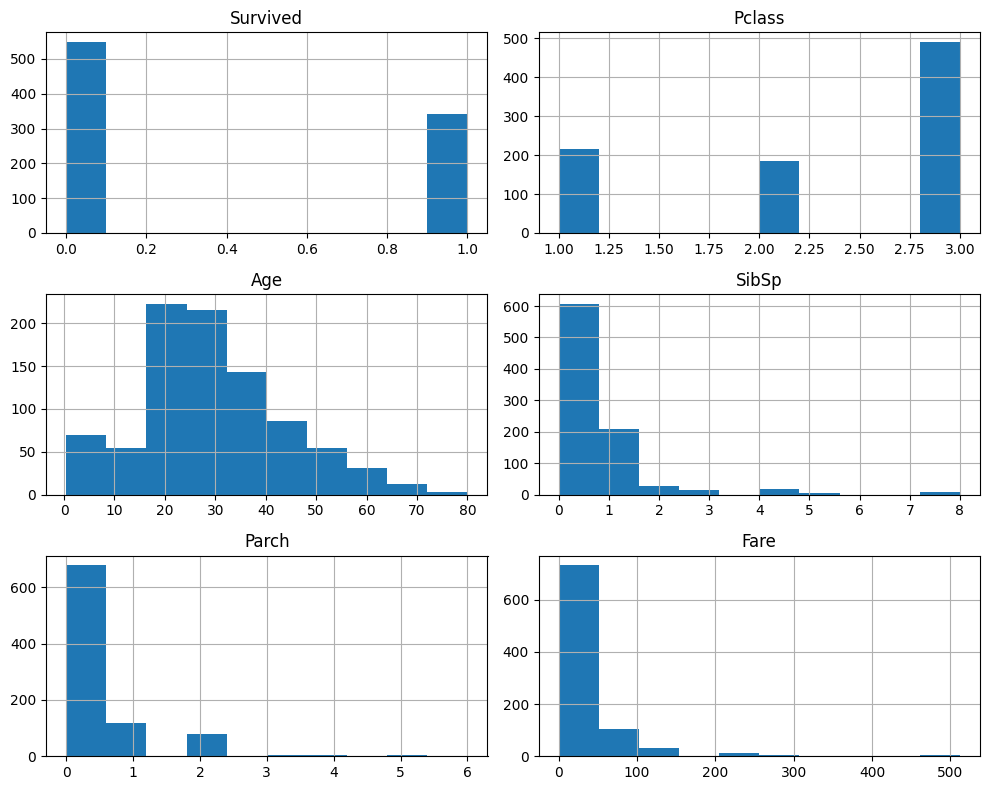

In [82]:
# sibsp: of siblings / spouses aboard the Titanic
# parch	: of parents / children aboard the Titanic
# embarked	: Port of Embarkation

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## 4. Feature engineering  &  EDA (heatmap)

In [83]:
# Initialize 'Kids' and 'SibSp_Parch' columns with zeros
df['Kids'] = 0
df['SibSp_Parch'] = 0

# Assign 1 to 'Kids' column for rows where 'Age' is less than or equal to 16
df.loc[df['Age'] <= 16, 'Kids'] = 1

# Calculate 'SibSp_Parch' as the sum of 'SibSp' and 'Parch'
df['SibSp_Parch'] = df['SibSp'] + df['Parch']

# Map 'Embarked' values to numerical codes
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Map 'Sex' values to numerical codes
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})


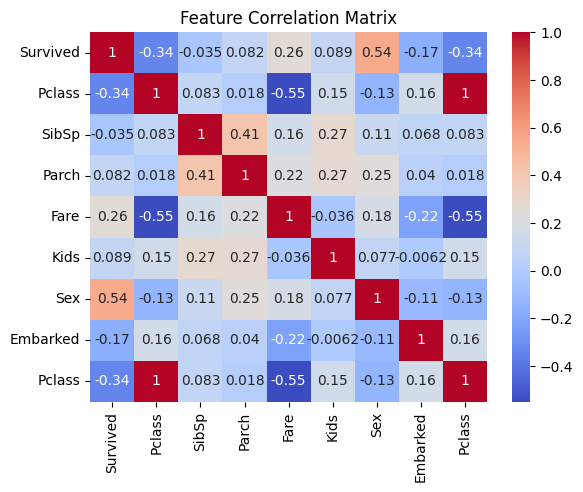

In [86]:
#Bivariate analysis
df_ba=df[['Survived', 'Pclass', 'SibSp','Parch', 'Fare',
       'Kids', 'Sex','Embarked', 'Pclass']]
corr_matrix=df_ba.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

## Conclusion from heatmap

1. Correlation coefficient between 'Survived' and 'Sex' : 0.543, moderate positive correlation: being female is associated with a higher chance of survival.

2. Correlation coefficient between 'Survived' and 'Pclass' : -0.338, moderate negative correlation: higher class passengers are more likely to survive than lower class passengers.



Overall, based on this analysis:
- The most important factor in determining survival of the titanic incident is 'Sex'; Being female is associated with a higher likelihood of survival.
- Belonging to a higher socioeconomic class (lower Pclass) are associated with a higher likelihood of survival; the data analysis aligns with the movie.
- Correlation coefficients between 'Survived' and 'Age'/'Kids' are insignificant, i.e. being kids is not associated with a higher chance of survival. Therefore, "Women and children first" does not stand.
- Correlation coefficients between 'Kids' and 'Parch''sibsp' are moderate positive, which does make sense, as there might be families traveling together.